# This is for jsq, pod, nostro (not for jbt)


In [ ]:
from random import *
#import random
from math import *
import numpy as np
import time 
import matplotlib.pyplot as plt
import csv
import pandas as pd

# constant:
T_0=1
q=3/5
E_Y=10
a=1/2 # =>gamma(2+1)=2!=2
N=20


def beta(ro, N=N, t0=T_0, q=q, EY=E_Y):
    return (ro*N*(t0+(1-q)*EY))/2

def sample_inter_arrival(T0=T_0, Y_mean=E_Y):
    r1, r2 = random(), random()
    T=None
    if r1<q:
        T=T0
    else:
        T=round(T0-Y_mean*log(r2), 0)
    return T

def sample_processing_time(bet, a=a):
    r3=random()
    return max(1, min(100*2*bet, round(bet*(-log(r3))**(1/a), 0)))


def longest_residual_time(servers):
    vuota = []
    for i in range(N):
        vuota.append(sum(servers[i][1]))
    return max(vuota)

def time_goes_on_server(server, dt):
    #print(server[1][0], dt)
    try:
        #print(server[1][0], dt)
        if server[1][0] <= dt:
         #   print('e')
            residual = dt - server[1][0]
          #  print('a')
            del server[0][0]
            del server[1][0]
            if residual > 0:
           #     print('b')
                time_goes_on_server(server, residual)
        else:
            #print('c')
            #server1 = server
            server[1][0] -= dt
    except:
      #  print('d')
        pass
    return


# our
def shorter_queue_time_inventato(servers):
    vuota = []
    for i in range(N):
        vuota.append(sum(servers[i][1]))
    return vuota.index(min(vuota))

##### prove jsq
def choose_with_jsq(servers):
    vuota = []
    for i in range(N):
        vuota.append(len(servers[i][0]))
    return vuota.index(min(vuota))   


##### prove pod
def choose_with_pod_d(servers):
    vuota = []
    a = sample(list_servers, 3)
    for i in a:
        vuota.append(len(servers[i][0]))
    return a[vuota.index(min(vuota))]




In [ ]:
inter_iter = 20
rhos = np.append(np.arange(0.8, 1, 0.02, dtype = float), 0.99).round(2)
print('#ro', len(rhos), 'rhos',  rhos)
iterazioni=101000
scarto = 1000


list_servers = [i for i in range(N)]


#ro 11 rhos [0.8  0.82 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 0.99]


In [ ]:
start=time.time()
#start=tempo.time()
E_D_rho = []
real_rho = []
sd = []
ci = []
for rho in rhos:
    print(rho, time.time()-start)

    # evaluate beta
    bet = beta(rho)
    E_D = []
    before_mean_rhos = []
    for _ in range(inter_iter):         # this loop is for the mean
        arrivals_samples=[int(round(sample_inter_arrival(), 0)) for i in range(iterazioni)]   
        arrival_times=list(np.cumsum(arrivals_samples))
        arrival_times.insert(0,0)
        E_T = np.mean(arrivals_samples)

        
        # for each server i built a list  [[task_1, .., task_n], [time_task_1, .., time_task_n]]
        servers = {i:[[], []] for i in range(N)}
        time_inside_servers = []
        # sample processing_time w.r.t. beta(rho)
        processing_samples=[int(round(sample_processing_time(bet), 0)) for i in range(iterazioni)]
        E_X = np.mean(processing_samples)
        before_mean_rhos.append(E_X/(N*E_T))
        #print(processing_samples)
        for i in range(iterazioni):
            t = arrival_times[i+1] # this time
            dt = t - arrival_times[i] # this - previous 
            for j in range(N):
                time_goes_on_server(servers[j], dt)
            '''
            nostro inventato
            '''
            #shorter = shorter_queue_time_inventato(servers)
            
            '''
            jsq
            '''
            #shorter = choose_with_jsq(servers)
            
            
            '''
            Pod_d
            '''
            shorter = choose_with_pod_d(servers)
            

            servers[shorter][0].append(i)
            servers[shorter][1].append(processing_samples[i])
            time_inside_servers.append(sum(servers[shorter][1]))
        
        E_D.append(np.mean(time_inside_servers[scarto:]))
        #tempo_fin = arrival_times[-1] + longest_residual_time(servers)
    E_D_rho.append(np.mean(E_D))
    real_rho.append(np.mean(before_mean_rhos))
    sd.append(np.std(E_D))
    ci.append((np.std(E_D)*1.96)/np.sqrt(len(real_rho)))
            
            
print(time.time()-start)       


0.8 0.0003619194030761719
0.82 44.48671364784241
0.84 89.189772605896
0.86 133.99776434898376
0.88 178.95992493629456
0.9 224.17211437225342
0.92 269.60946440696716
0.94 315.37452721595764
0.96 361.737224817276
0.98 408.9085690975189
0.99 458.3587911128998
510.4026107788086


[0.04995315 0.04591086 0.03113372 0.05380806 0.02658279 0.05185383
 0.05366082 0.0360862  0.05454424 0.04806585 0.03390443 0.03500201
 0.09567662 0.03774595 0.03251238 0.04429126 0.08049793 0.04635256
 0.09088475 0.05153259]


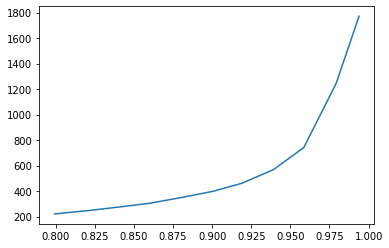

In [ ]:

vuota = []
for i in range(N):
    vuota.append(sum(servers[i][1]))


print(np.array(vuota)/ sum(vuota))


plt.plot(real_rho,E_D_rho)
#plt.axis([0.78,1,0,3200,])


In [ ]:
mean_msg = [2*3 for i in range(len(real_rho))]


d  = {'Rho' : rhos, 'Mean_Time':E_D_rho,'Mean_Msg': mean_msg, 'Rho_Emp':real_rho,'CI': ci}
df = pd.DataFrame(data=d)    
    
df.to_csv('pod.csv', index = False)


 # This is for JBT


In [ ]:
from random import *
#import random
from math import *
import numpy as np
import time 
import matplotlib.pyplot as plt
import csv
import pandas as pd
import copy

# constant:
T_0=1
q=3/5
E_Y=10
a=1/2 # =>gamma(2+1)=2!=2
N=20


def beta(ro, N=N, t0=T_0, q=q, EY=E_Y):
    return (ro*N*(t0+(1-q)*EY))/2

def sample_inter_arrival(T0=T_0, Y_mean=E_Y):
    r1, r2 = random(), random()
    T=None
    if r1<q:
        T=T0
    else:
        T=round(T0-Y_mean*log(r2), 0)
    return T

def sample_processing_time(bet, a=a):
    r3=random()
    return max(1, min(100*2*bet, round(bet*(-log(r3))**(1/a), 0)))


def longest_residual_time(servers):
    vuota = []
    for i in range(N):
        vuota.append(sum(servers[i][1]))
    return max(vuota)

def time_goes_on_server(server, dt, number_server, threshold, ones, messaggi_it):
    #print(server[1][0], dt)
    try:
     #   print(server[1][0], dt)
        if server[1][0] <= dt:
            residual = dt - server[1][0]
           
#            print('a',server[1][0], dt, residual, number_server, threshold)
            del server[0][0]
            del server[1][0]

            if len(server[1]) <= threshold:
                messaggi_it += 1
 #               print('in', ones)
                ones.append(number_server)
  #              print(ones)
            #print('a')
            if residual > 0:
   #             print('b', residual)
                time_goes_on_server(server, residual, number_server, threshold, ones, messaggi_it)
        else:
    #        print('c',server[1][0], dt, number_server, threshold)
            #server1 = server
            server[1][0] -= dt
    except:
     #   print('d',server, dt, number_server, threshold)
        pass
    return


##### prove JBT-d
def threshold_with_jbt_d(servers):
    vuota = []
    where = sample(list_servers, 3)
    what.append(where)
 #   print(where)
    for i in where:
        vuota.append(len(servers[i][0]))
    threshold = min(vuota)-1
    return max(1,threshold)#int(np.mean(vuota)))

def build_ones_with_jbt_d(servers, threshold):
    ones = []
    for i in range(N):
        if len(servers[i][0])<=threshold:
            #print(i, servers[i][0])
            ones.append(i)
            #print(i, ones)
    return ones

def choose_with_jbt_d(servers, ones):
    if len(ones) != 0:
        out  = sample(ones, 1)
        ones.remove(out[0])
    else:
        out  = sample(list_servers, 1)
    return out[0]



In [ ]:
inter_iter = 20
rhos = np.append(np.arange(0.8, 1, 0.02, dtype = float), 0.99).round(2)
print('#ro', len(rhos), 'rhos',  rhos)
iterazioni=101000
scarto = 1000
sondaggio_ogni = 1000

list_servers = [i for i in range(N)]

#ro 11 rhos [0.8  0.82 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 0.99]


In [ ]:
SERVERS = []

start=time.time()
#start=tempo.time()
E_D_rho = []
real_rho = []
sd = []
ci = []
len_of_ones = []
r = []
what = []
Messaggi = []
for rho in rhos:
    print(rho, time.time()-start)

    # evaluate beta
    bet = beta(rho)
    print(bet)
    E_D = []
    before_mean_rhos = []
    len_of_ones_rho = []
    r_rho = []
    messaggi_rho = []

    for _ in range(inter_iter):         # this loop is for the mean
        #print(_)
        arrivals_samples=[int(round(sample_inter_arrival(), 0)) for i in range(iterazioni)]   
        arrival_times=list(np.cumsum(arrivals_samples))
        arrival_times.insert(0,0)
        E_T = np.mean(arrivals_samples)

        '''
        only for JBT
        '''
        jbt_sample = np.diff(np.array(arrival_times)%sondaggio_ogni)

        # for each server i built a list  [[task_1, .., task_n], [time_task_1, .., time_task_n]]
        servers = {i:[[], []] for i in range(N)}
        time_inside_servers = []
        # sample processing_time w.r.t. beta(rho)
        processing_samples=[int(round(sample_processing_time(bet), 0)) for i in range(iterazioni)]
        E_X = np.mean(processing_samples)
        before_mean_rhos.append(E_X/(N*E_T))

        len_of_ones_it = []
        r_it = []
        messaggi_it = 0

        threshold = 1
        ones=[]
        #print(processing_samples)
        for i in range(iterazioni):
            t = arrival_times[i+1] # this time
            dt = t - arrival_times[i] # this - previous 
            for j in range(N):
                time_goes_on_server(servers[j], dt, j, threshold, ones, messaggi_it)
            '''
            nostro inventato
            '''
            #shorter = shorter_queue_time_inventato(servers)
            
            '''
            jsq
            '''
            #shorter = choose_with_jsq(servers)
            
            
            '''
            Pod_d
            '''
            #shorter = choose_with_pod_d(servers)
            

            '''
            JBT_d
            '''
         
            if arrival_times[i] == 0 or jbt_sample[i] <0:
 
              threshold = threshold_with_jbt_d(servers)
              r_it.append(threshold)
              ones = build_ones_with_jbt_d(servers, threshold)
              messaggi_it += 2*3+N+len(ones)
  
              SERVERS.append(copy.deepcopy(servers))
    
            len_of_ones_it.append(len(ones))
            shorter = choose_with_jbt_d(servers, ones)
            

            '''
            random
            '''
            #shorter = sample(list_servers,1)[0]
            

            servers[shorter][0].append(i)
            servers[shorter][1].append(processing_samples[i])
            time_inside_servers.append(sum(servers[shorter][1]))

        len_of_ones_rho.append(len_of_ones_it)
        r_rho.append(r_it)
        messaggi_rho.append(messaggi_it)
        E_D.append(np.mean(time_inside_servers[scarto:]))
        #tempo_fin = arrival_times[-1] + longest_residual_time(servers)
    E_D_rho.append(np.mean(E_D))
    real_rho.append(np.mean(before_mean_rhos))
    sd.append(np.std(E_D))
    ci.append((np.std(E_D)*1.96)/np.sqrt(len(real_rho)))
    len_of_ones.append(np.mean(np.array(len_of_ones_rho), axis=0))
    r.append(r_rho)
    Messaggi.append(np.mean(messaggi_rho))
  
            
print(time.time()-start)       


In [ ]:
E_D_rho

[0.06624085 0.04821983 0.08759585 0.05118532 0.02305708 0.11321483
 0.07696222 0.05086947 0.01414308 0.03516468 0.04641247 0.0248469
 0.0213199  0.06971521 0.05229079 0.06102932 0.0340592  0.04369264
 0.03497166 0.04500869]


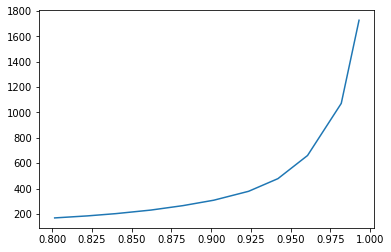

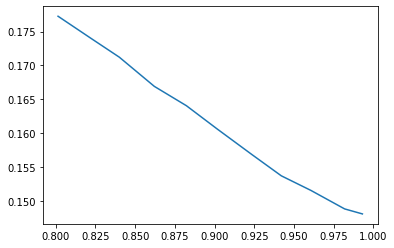

In [ ]:
vuota = []
for i in range(N):
    vuota.append(sum(servers[i][1]))


print(np.array(vuota)/ sum(vuota))


plt.plot(real_rho,E_D_rho)
plt.show()
plt.plot(real_rho, np.array(Messaggi)/iterazioni)
#plt.axis([0.78,1,0,3200,])
#plt.plot(r[1])

In [ ]:

d  = {'Rho' : rhos, 'Mean_Time':E_D_rho,'Mean_Msg': np.array(Messaggi)/iterazioni, 'Rho_Emp':real_rho,'CI': ci}
df = pd.DataFrame(data=d)    
    
df.to_csv('jbt.csv', index = False)




In [ ]:
for j in range(len(rhos)):
  #plt.plot(len_of_ones[j])
  #plt.show()
  print(np.mean(len_of_ones[j]))

In [ ]:
summ = 0
for j in list_servers:
  summ += len(servers[j][0])
summ


11000

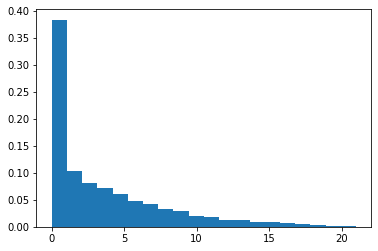

In [ ]:
for j in range(len(rhos)):
  plt.hist(len_of_ones[j], bins=20, density=True)
  plt.show()

(array([54.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

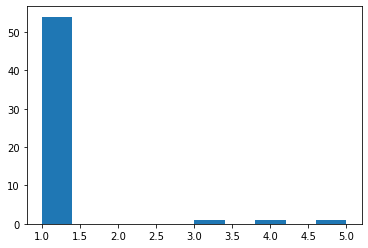

In [ ]:
plt.hist(r[0][0])

In [ ]:
for s in range(len(SERVERS)):
  print('SERVERS = ', s)
  a = []
  for j in range(N):
    #print('server = ', j, 'len = ', len(SERVERS[s][j][1]))
    a.append(len(SERVERS[s][j][1]))
  plt.plot(a, marker = 'd', linestyle ='')
  plt.hlines(y = r[0][0][s], xmin=0, xmax=20)
  plt.show()

In [ ]:
'''
# with only one
for s in range(len(SERVERS)):
  print(SERVERS[s])
'''

for s in range(len(SERVERS)):
  print('SERVERS = ', s)
  a = []
  b = []
  for j in range(N):
    a.append(len(SERVERS[s][j][1]))
    b.append(sum(SERVERS[s][j][1]))
  print(min(a[what[s][0]],a[what[s][1]],a[what[s][2]]), r[0][0][s], np.mean(a), a, what[s][0],what[s][1],what[s][2])
  print(b)


# With uncertanty

In [ ]:
from random import *
#import random
from math import *
import numpy as np
import time 
import matplotlib.pyplot as plt
import csv
import pandas as pd

# constant:
T_0=1
q=3/5
E_Y=10
a=1/2 # =>gamma(2+1)=2!=2
N=20


def beta(ro, N=N, t0=T_0, q=q, EY=E_Y):
    return (ro*N*(t0+(1-q)*EY))/2

def sample_inter_arrival(T0=T_0, Y_mean=E_Y):
    r1, r2 = random(), random()
    T=None
    if r1<q:
        T=T0
    else:
        T=round(T0-Y_mean*log(r2), 0)
    return T

def sample_processing_time(bet, a=a):
    r3=random()
    return max(1, min(100*2*bet, round(bet*(-log(r3))**(1/a), 0)))


def longest_residual_time(servers):
    vuota = []
    for i in range(N):
        vuota.append(sum(servers[i][1]))
    return max(vuota)

def time_goes_on_server(server, dt):
    #print(server[1][0], dt)
    try:
        #print(server[1][0], dt)
        if server[1][0] <= dt:
         #   print('e')
            residual = dt - server[1][0]
          #  print('a')
            del server[0][0]
            del server[1][0]
            if residual > 0:
           #     print('b')
                time_goes_on_server(server, residual)
        else:
            #print('c')
            #server1 = server
            server[1][0] -= dt
    except:
      #  print('d')
        pass
    return


# our
def shorter_queue_time_inventato(servers):
    vuota = []
    for i in range(N):
        vuota.append(sum(servers[i][1]))
    return vuota.index(min(vuota))


In [ ]:
  
inter_iter = 20
rhos = np.append(np.arange(0.8, 1, 0.02, dtype = float), 0.99).round(2)
print('#ro', len(rhos), 'rhos',  rhos)
iterazioni=101000
scarto = 1000


list_servers = [i for i in range(N)]

In [ ]:

start=time.time()

E_D_rho = []
real_rho = []
sd = []
ci = []
for rho in rhos:
    print(rho, time.time()-start)
    # evaluate beta
    bet = beta(rho)
    E_D = []
    before_mean_rhos = []
    for _ in range(inter_iter):         # this loop is for the mean
        print(_)
        arrivals_samples=[int(round(sample_inter_arrival(), 0)) for i in range(iterazioni)]   
        arrival_times=list(np.cumsum(arrivals_samples))
        arrival_times.insert(0,0)
        E_T = np.mean(arrivals_samples)

        # for each server i built a list  [[task_1, .., task_n], [time_task_1, .., time_task_n]]
        servers = {i:[[], []] for i in range(N)}
        servers_reale = {i:[[], []] for i in range(N)}
        time_inside_servers = []
        # sample processing_time w.r.t. beta(rho)
        processing_samples=[int(round(sample_processing_time(bet), 0)) for i in range(iterazioni)]
        E_X = np.mean(processing_samples)
        before_mean_rhos.append(E_X/(N*E_T))
        #print(processing_samples)
        for i in range(iterazioni):
            t = arrival_times[i+1] # this time
            dt = t - arrival_times[i] # this - previous 
            for j in range(N):
                time_goes_on_server(servers[j], dt)
                time_goes_on_server(servers_reale[j], dt)
            '''
            nostro inventato
            '''
            shorter = shorter_queue_time_inventato(servers)
            
            


            servers[shorter][0].append(i)
            servers[shorter][1].append(processing_samples[i])
            servers_reale[shorter][0].append(i)
            error = processing_samples[i]*0.5
            value = max(1, int(np.random.normal(loc = processing_samples[i], scale = error)))
            servers_reale[shorter][1].append(value)
            time_inside_servers.append(sum(servers_reale[shorter][1]))
        
        E_D.append(np.mean(time_inside_servers[scarto:]))
        #tempo_fin = arrival_times[-1] + longest_residual_time(servers)
    E_D_rho.append(np.mean(E_D))
    real_rho.append(np.mean(before_mean_rhos))
    sd.append(np.std(E_D))
    ci.append((np.std(E_D)*1.96)/np.sqrt(len(real_rho)))
            
            
print(time.time()-start)       



In [ ]:
vuota = []
for i in range(N):
    vuota.append(sum(servers[i][1]))


print(np.array(vuota)/ sum(vuota))


plt.plot(real_rho,E_D_rho)



In [ ]:
mean_msg = [0 for i in range(len(real_rho))]


d  = {'Rho' : rhos, 'Mean_Time':E_D_rho,'Mean_Msg': mean_msg, 'Rho_Emp':real_rho,'CI': ci}
df = pd.DataFrame(data=d)    
    
df.to_csv('nostro_con_incertezza_50.csv', index = False)


